### <font color='darkred'>IA Aplicado a Finanças</font>

### <font color='darkgreen'>Estruturação de Derivativos Para Hedging de Riscos de Commodities</font>

### <font color='darkblue'> Parte 3 - Inteligência Artificial </font>

### <font color = darkred> Carregando Dados </font>

In [1]:
# Versão do Python usado nesse notebook
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
#!pip install tensorflow
#!pip install numpy==1.24.3 pandas==1.5.3

In [3]:
# Imports
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential #cria a sequencia de camadas da rede neural artificial
from tensorflow.keras.layers import LSTM, Dense #2 camadas pra montar o modelo

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

keras     : 3.6.0
tensorflow: 2.18.0
sklearn   : 1.3.0
pandas    : 1.5.3
matplotlib: 3.7.1
platform  : 1.0.8
numpy     : 1.24.3



### <font color = darkred> Parte 3 - Inteligência Artificial </font>

- Simulador Para Estratégia de Hedge com Inteligência Artificial, onde o algoritmo vai se encarregar de entender o padrão dos dados e não colocaremos manualmente como na modelagem estistica feita anteriormente.
- Moficando somente a parte de IA em comparação NB anterior, agora a vol e o drift o algoritimo vai estimar.

In [5]:
# Definimos a semente (Apenas para reproduzir o projeto. Depois pode ser removido!)
SEED = 142
random.seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [6]:
# Carrega o arquivo CSV
df = pd.read_csv("preco_petroleo.csv")

In [7]:
# Calcula a série de retornos
# na modelagem estatistica alimentamos com valor do petroleo manualmente, modelo fez a previsão e calcumos o retorno previsto
# agora, vamos calcular a mudança % de um dia pra outro do valor real, e usamos esse valor de retorno pra treinar o modelo.
# porque o modelo de Ia tem capacidade de aprendizado maior que o ARIMA, por isso faremos diferente
# pct change gera o % de mudança
df['Retornos'] = df['PrecoPetroleo'].pct_change().dropna()

In [8]:
# Padroniza os retornos para treinamento
# no ARIMA ele mesmo normaliza os dados, com IA precisa entregar dados padronizados
# Modelos de IA esperam receber os dados na mesma escala. (requerimento de rede neural artificial)
scaler = MinMaxScaler()
scaled_returns = scaler.fit_transform(df[['Retornos']].dropna())

In [9]:
# vamos usar uma Rede Neural Artificial que tem uma arquitetura recorrente (RNN), uma das variaçoes da RNN
# LSTM - Long Short Term Memory - uma das melhores aruqiteturas de redes recorrentes, de aprendizado supervisionado
# redes recorrentes tem uma especie de memória, otimo pra sequencias, funciona bem com series temporais
# como nossos dados não tem entrada e saida, vamos pegar 30 dias de preço do petroleo como entrada
# e vamos pegar o dia 31 como saida, e o modelo vai aprender a sequencia.
# Vamos mover janelas pelo dados, 30 valores, preve os 31, e assim por diante, movendo 1 posição de cada vez.

# Listas de X e y
X, y = [], []

# Loop pelo dados já padronizados
# Cria a estrutura de dados com 30 timesteps e 1 saída
for i in range(30, len(scaled_returns)):
    X.append(scaled_returns[i-30:i, 0])
    y.append(scaled_returns[i, 0])

In [10]:
# Ao fim do loop temos 2 listas X e y precisamos converter para array numpy
# Converte para array NyumPy e ajusta o shape
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
# Inicializa o modelo
# cria uma sequencia de camadas
modelo_preco_ia = Sequential()

In [12]:
# Adiciona as camadas LSTM
# essa função tem o algoritmo LSTM
# units é um hiperparametro que é o nº de neuronios matematicos, retorna sequencia
# input_shape é a matriz de entrada, vai receber o valor de X com shape de indice dentro da matriz [1]
# retorna a coluna com todos os valores, 1 valor pra cada linha e uma unica coluna
# pode acrescentar mais camadas, mas deve tomar cuidado com overfitting

modelo_preco_ia.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
modelo_preco_ia.add(LSTM(units = 50))

C:\Users\miche\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Camada de saída
# Adiciona a camada de saida, a camada densa com apenas 1 unidade, porque o modelo vai prever 1 unidade
# esse unidade é o retorno, por vez, se fosse prever mais variaveis, mudaria o units da camada densa 

modelo_preco_ia.add(Dense(units = 1))

In [14]:
# Compila o modelo
# depois de add as camadas compila o modelo
# usaremos o adam, o algoritmo de otimização e a função de erro usaremos MSR
# otimização matematica pra reduzir o erro
modelo_preco_ia.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
#alimenta X e y e treina por 50 passagens alimentando com lote de dados = 16 (para otimizar memoria)
# Treina o modelo
modelo_preco_ia.fit(X, y, epochs = 50, batch_size = 16)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1064
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0385
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0398
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0405
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0404
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0402
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0401
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0400
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0399
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0398
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0397
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0396
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0394
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0394
Epoch 

In [16]:

# Após treinar o modelo fazemos previsões para os próximos 30 dias
retornos_previstos = modelo_preco_ia.predict(X[-30:]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [17]:
# como padronizamos os dados antes,pra treinar o modelo vai entregar os dados padronizados
# Despadronizamos os retornos previstos, pedindo a inverse_transform
retornos_previstos = scaler.inverse_transform(retornos_previstos)

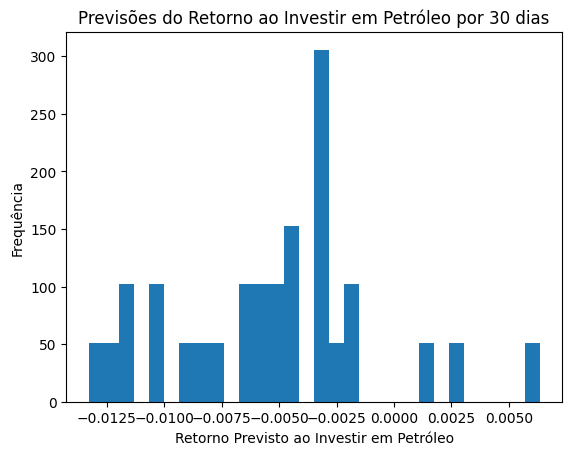

In [18]:
# Plot das previsões do modelo
plt.hist(retornos_previstos, bins = 30, density = True)
plt.title('Previsões do Retorno ao Investir em Petróleo por 30 dias')
plt.xlabel('Retorno Previsto ao Investir em Petróleo')
plt.ylabel('Frequência')
plt.savefig('IA_previsoes_retornos.png')
plt.show()

In [19]:
# Calculamos o drift e a volatilidade dos retornos previstos
# Calculamos pros proximos 30 dias pra entregar na Simulação de Monte Carlo
drift = np.mean(retornos_previstos)
volatilidade = np.std(retornos_previstos)

In [20]:
print("\nDrift previsto com base no modelo de IA:")
print(drift)
print("\nVolatilidade prevista com base no modelo de IA:")
print(volatilidade)


Drift previsto com base no modelo de IA:
-0.005241413

Volatilidade prevista com base no modelo de IA:
0.0044231154


### <font color = darkred> Simulação de Monte Carlo </font>

In [21]:
# Número de simulações
n_simulations = 1000

# Lista
forecast_30d = []

# Inicia um loop para realizar 'n_simulations' simulações.
for _ in range(n_simulations):
    
    # Inicia uma lista com o último preço de petróleo observado.
    precos_simulados = [df['PrecoPetroleo'].iloc[-1]]
    
    # Inicia um loop para simular preços durante 30 dias.
    for i in range(30):
        
        # Calcula um novo preço simulado usando o último preço, o drift e a volatilidade.
        preco_simulado = precos_simulados[-1] * np.exp(random.gauss(drift, volatilidade))
        
        # Adiciona o novo preço simulado à lista de preços simulados.
        precos_simulados.append(preco_simulado)
    
    # Adiciona o último preço simulado à lista 'forecast_30d' que guarda as simulações.
    forecast_30d.append(precos_simulados[-1])

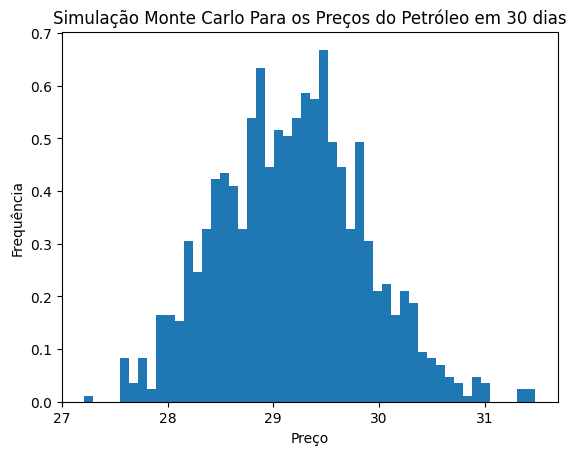

In [22]:
# Plot do forecast_30d
plt.hist(forecast_30d, bins = 50, density = True)
plt.title('Simulação Monte Carlo Para os Preços do Petróleo em 30 dias')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.savefig('IA_previsoes_preco_smc.png')
plt.show()

### <font color = darkred> Estratégia de Hedge </font>

In [23]:
# Custo corrente do petróleo é o último valor da série de dados
custo_corrente_petroleo = 1.5 * df['PrecoPetroleo'].iloc[-1]

In [24]:
# O custo futuro do petróleo é a média das simulações de 30 dias multiplicada pelo fator 1.5
custo_futuro_petroleo = 1.5 * np.mean(forecast_30d)

In [25]:
# Suponha que você consome 1000 barris por dia
consumo_diario = 1000  

In [26]:
# Custo futuro sem hedge
custo_futuro_sem_hedge = custo_futuro_petroleo * consumo_diario * 30

In [27]:
# Suponha que o contrato de futuros permite que você fixe o preço do petróleo em $35
preco_contrato_futuro = 45

In [28]:
# Calculamos o custo futuro considerando o instrumento financeiro (contrato futuro)
custo_futuro_petroleo_com_hedge = 1.5 * preco_contrato_futuro

In [29]:
# Custo futuro com estratégia de Hedge. Estamos reduzindo o risco, pois temos o preço do petróleo fixado através
# de um instrumento financeiro
custo_futuro_com_hedge = custo_futuro_petroleo_com_hedge * consumo_diario * 30

print(f"\nCusto futuro sem hedge: ${custo_futuro_sem_hedge:.3f}")
print(f"\nCusto futuro com hedge: ${custo_futuro_com_hedge:.3f}")


Custo futuro sem hedge: $1312812.296

Custo futuro com hedge: $2025000.000


In [30]:
# Verifica o resultado e imprime a conclusão
if custo_futuro_com_hedge < custo_futuro_sem_hedge:
    print("\nA estratégia de Hedge resultou em economia.")
else:
    print("\nA estratégia de Hedge não resultou em economia.")


A estratégia de Hedge não resultou em economia.


In [31]:
print("\nFim\n")


Fim



### Introdução ao TensorFlow

**TensorFlow** é uma biblioteca de código aberto desenvolvida pelo Google para facilitar a criação e o treinamento de modelos de machine learning, especialmente redes neurais profundas (deep learning). Ele foi projetado para ser uma plataforma poderosa e flexível, capaz de realizar operações em diferentes dispositivos, como CPUs, GPUs e até TPUs (unidades de processamento de tensor desenvolvidas pelo Google).

#### 1. Estrutura de Computação Baseada em Tensores

- O nome "TensorFlow" vem da ideia de "fluxo de tensores". Um **tensor** é uma estrutura de dados que representa arrays multidimensionais (como vetores e matrizes). No TensorFlow, tudo é representado como tensores, o que permite realizar operações matemáticas complexas de maneira eficiente.
- A biblioteca permite que esses tensores "fluam" através de uma série de operações matemáticas, criando o "fluxo" de dados que o nome sugere. Isso é essencial para o treinamento de redes neurais, que dependem de muitas operações matemáticas aplicadas em camadas de dados.

#### 2. Versatilidade e Flexibilidade

- O TensorFlow é altamente flexível e pode ser usado para uma ampla gama de tarefas, incluindo:
  - **Classificação de imagens** (visão computacional)
  - **Processamento de linguagem natural** (NLP), como tradução de idiomas e análise de sentimentos
  - **Séries temporais e previsão** (como previsão de vendas ou análise de dados financeiros)
  - **Reconhecimento de voz** e muito mais.
- Ele permite que você defina modelos personalizados com operações complexas, o que é útil para pesquisa e desenvolvimento de novos algoritmos de IA.

#### 3. Suporte para GPUs e TPUs

- TensorFlow foi projetado para aproveitar o poder de GPUs (Unidades de Processamento Gráfico), o que acelera drasticamente o treinamento de modelos de deep learning. Isso é especialmente útil em redes neurais profundas, que exigem muitos cálculos paralelos.
- Google também oferece o suporte a **TPUs** (Tensor Processing Units), um tipo de hardware desenvolvido especificamente para operações de TensorFlow. TPUs são ainda mais rápidas e otimizadas para modelos de aprendizado profundo e podem ser usadas na Google Cloud Platform.

#### 4. Keras: Interface de Alto Nível

- O **Keras** é uma API de alto nível para construção de modelos que agora faz parte do TensorFlow. A Keras simplifica o processo de construção de modelos ao fornecer uma interface fácil de usar para definir, compilar e treinar redes neurais.
- Keras é especialmente útil para iniciantes e para desenvolvimento rápido, pois oferece uma maneira intuitiva de construir modelos complexos com poucas linhas de código.

#### 5. TensorFlow Lite e TensorFlow.js

- **TensorFlow Lite** é uma versão otimizada do TensorFlow para dispositivos móveis e embarcados, permitindo a execução de modelos de machine learning em smartphones, tablets e IoT (Internet das Coisas).
- **TensorFlow.js** permite executar modelos de machine learning no navegador, usando JavaScript. Isso é útil para criar aplicações interativas e levar a IA para a web.

#### 6. TensorFlow Extended (TFX) e Produção

- **TensorFlow Extended (TFX)** é uma plataforma completa de machine learning para ambientes de produção. Com o TFX, você pode desenvolver, treinar, implantar e monitorar modelos em grande escala. Ele fornece ferramentas para automação e controle de versão, além de pipelines para gerenciar fluxos de dados e treinamento de modelos.


### Diferenças entre TensorFlow e PyTorch

Tanto o **TensorFlow** quanto o **PyTorch** são bibliotecas populares para machine learning e deep learning, cada uma com seus próprios pontos fortes. A escolha entre as duas geralmente depende das preferências pessoais e do contexto do projeto. Aqui estão as principais diferenças:

#### 1. Definição Dinâmica vs. Definição Estática de Grafos Computacionais

- **PyTorch** usa uma **definição dinâmica de grafos computacionais** (*define-by-run*), onde o grafo é criado enquanto o código é executado. Isso facilita a depuração e experimentação, pois permite verificar e modificar o grafo em tempo real, como faria com um código Python comum.

- **TensorFlow** (especialmente antes da versão 2.0) usava uma **definição estática de grafos computacionais**, em que o grafo inteiro é definido antes de rodar o modelo. Isso dificulta a depuração, mas permite otimizações adicionais para produção. Com o TensorFlow 2.0, foi introduzido o modo de execução dinâmica (`eager execution`), tornando-o mais semelhante ao PyTorch nesse aspecto.

#### 2. Popularidade e Adoção

- **PyTorch** é muito popular na **comunidade acadêmica** e de pesquisa, pois facilita a experimentação e iteração rápida devido ao seu estilo de execução dinâmica. Muitos artigos acadêmicos usam PyTorch para implementações experimentais.

- **TensorFlow** tem uma forte presença na **indústria**, especialmente em produção, pois oferece ferramentas como **TensorFlow Extended (TFX)** e **TensorFlow Serving** para implantar modelos em larga escala.

#### 3. Keras como API de Alto Nível

- **TensorFlow** inclui o **Keras** como sua API de alto nível, facilitando a construção de modelos complexos com poucas linhas de código. Isso é especialmente útil para iniciantes e para o desenvolvimento rápido de protótipos.

- **PyTorch** tem uma API intuitiva e semelhante ao Keras, usando o módulo `nn` e `Sequential` para construir modelos. Além disso, **PyTorch Lightning** e a biblioteca **Transformers da Hugging Face** fornecem APIs de alto nível que tornam o desenvolvimento com PyTorch ainda mais simplificado.

#### 4. Suporte a GPUs e Desempenho

- Ambos oferecem suporte a **GPUs** para acelerar o treinamento de modelos. No entanto, **TensorFlow** tem integração nativa com **TPUs** (Tensor Processing Units), o hardware especializado do Google para deep learning, o que o torna uma escolha ideal para treinar grandes modelos na infraestrutura do Google Cloud.

- **PyTorch** também suporta GPUs, mas o suporte a TPUs não é tão direto quanto no TensorFlow (embora seja possível usar PyTorch com TPUs através de ferramentas como PyTorch XLA).

#### 5. Deployment e Produção

- **TensorFlow** oferece uma gama de ferramentas para deployment e produção, como:
  - **TensorFlow Extended (TFX)**: Para criar pipelines de machine learning em produção.
  - **TensorFlow Serving**: Para hospedar modelos em tempo real.
  - **TensorFlow Lite**: Para dispositivos móveis e IoT.
  - **TensorFlow.js**: Para rodar modelos em navegadores.

  Essas ferramentas tornam o TensorFlow uma opção mais robusta para ambientes de produção.

- **PyTorch** introduziu recentemente o **TorchServe** (servidor de modelos desenvolvido pela AWS) e **TorchScript** (para converter modelos em grafos estáticos otimizados), mas seu ecossistema de produção ainda é menos maduro que o do TensorFlow.

#### 6. Comunidade e Recursos

- **PyTorch** tem uma comunidade acadêmica ativa e muitos tutoriais e publicações são focados no PyTorch, tornando-o uma escolha comum para pesquisa e aprendizado em deep learning.

- **TensorFlow** é amplamente suportado pelo Google e tem uma forte comunidade industrial, com muitos recursos educacionais e suporte empresarial. Ele é amplamente usado por grandes empresas para problemas de produção em larga escala.

#### 7. Facilidade de Uso

- **PyTorch** é geralmente considerado mais "Pythonic" e fácil de entender, especialmente para quem já conhece Python. Sua estrutura é mais intuitiva e próxima do código Python tradicional, facilitando a depuração e a experimentação.

- **TensorFlow**, embora tenha melhorado significativamente com o TensorFlow 2.x e o `eager execution`, ainda pode parecer mais complexo para iniciantes, especialmente devido à sua estrutura voltada para produção.

#### Resumo: Quando Escolher Cada Um

- **Use PyTorch** se você está focado em pesquisa, aprendizado, ou desenvolvimento rápido de protótipos, especialmente se você quer algo fácil de entender e depurar.
  
- **Use TensorFlow** se você precisa de uma solução escalável para produção, com suporte robusto para deployment e integração em grandes ambientes empresariais. TensorFlow é uma boa escolha para projetos que precisam de pipelines completos de machine learning e para empresas que já utilizam a infraestrutura do Google.

Ambos são bibliotecas poderosas e capazes de realizar tarefas complexas de aprendizado profundo. A escolha final depende das necessidades do projeto e das preferências do desenvolvedor.
